In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

/Users/briannagreen/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv")

In [3]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   GSM               64 non-null     object 
 9   ALIVE             6893 non-null   object 
 10  APPEARANCES       6541 non-null   float64
 11  FIRST APPEARANCE  6827 non-null   object 
 12  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [5]:
df['HAIR'].unique()

array(['Black Hair', 'Brown Hair', 'White Hair', 'Blond Hair', 'Red Hair',
       nan, 'Green Hair', 'Strawberry Blond Hair', 'Grey Hair',
       'Silver Hair', 'Orange Hair', 'Purple Hair', 'Gold Hair',
       'Blue Hair', 'Reddish Brown Hair', 'Pink Hair', 'Violet Hair',
       'Platinum Blond Hair'], dtype=object)

In [6]:
df['EYE'].unique()

array(['Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Purple Eyes',
       'Black Eyes', 'White Eyes', 'Red Eyes', 'Photocellular Eyes',
       'Hazel Eyes', 'Amber Eyes', 'Yellow Eyes', nan, 'Grey Eyes',
       'Pink Eyes', 'Violet Eyes', 'Gold Eyes', 'Orange Eyes',
       'Auburn Hair'], dtype=object)

In [7]:
# Add column indicating if the character has blond hair + blue eyes
# For hair colors, I selected the colors that readers of the comics would most likely associate with 'blond'
df['blond_blue'] = (
    df['HAIR'].isin(['Blond Hair', 'Strawberry Blond Hair', 'White Hair', 'Platinum Blond Hair', 'Gold Hair'])
) & (
    df['EYE'] == 'Blue Eyes'
)

In [8]:
# How many blond + blue characters are there
df.blond_blue.value_counts()

False    6459
True      437
Name: blond_blue, dtype: int64

In [9]:
# How many of the blond + blue characters are Good/Neutral/Bad/missing a value
df[df['blond_blue'] == True].ALIGN.value_counts(dropna=False)

Good Characters       229
Bad Characters        132
Neutral Characters     43
NaN                    32
Reformed Criminals      1
Name: ALIGN, dtype: int64

In [10]:
# What percent of the blond + blue characters are Good/Neutral/Bad, dropping the NaN values
df[df['blond_blue'] == True].ALIGN.value_counts(normalize=True)

Good Characters       0.565432
Bad Characters        0.325926
Neutral Characters    0.106173
Reformed Criminals    0.002469
Name: ALIGN, dtype: float64

In [11]:
# How many of the not blond + blue characters are Good/Neutral/Bad/missing a value
df[df['blond_blue'] == False].ALIGN.value_counts(dropna=False)

Bad Characters        2763
Good Characters       2603
NaN                    569
Neutral Characters     522
Reformed Criminals       2
Name: ALIGN, dtype: int64

In [12]:
# What percent of the not blond + blue characters are Good/Neutral/Bad, dropping the NaN values
df[df['blond_blue'] == False].ALIGN.value_counts(normalize=True)

Bad Characters        0.469100
Good Characters       0.441935
Neutral Characters    0.088625
Reformed Criminals    0.000340
Name: ALIGN, dtype: float64

In [13]:
# Total number of appearances of good blond + blue characters
df[(df["blond_blue"] == True) & (df['ALIGN'] == 'Good Characters')].APPEARANCES.sum()

# Blond + blue characters made an average of 82.5 appearances

18902.0

In [14]:
# Total number of appearances of good not-blond + blue characters
df[(df["blond_blue"] == False) & (df['ALIGN'] == 'Good Characters')].APPEARANCES.sum()

# Not-blond + blue characters made an average of 31.3 appearances

81447.0

In [16]:
# How many characters were introduced each year?
df_year = df.groupby('YEAR').name.count().reset_index(name='count')
# df_year['YEAR'] = df_year['YEAR'].astype(int)
df_year.head()

,YEAR,count
0,1935.0,1
1,1936.0,9
2,1937.0,4
3,1938.0,10
4,1939.0,18


In [17]:
# How many blond + blue characters were introduced each year?
df_year_bb = df[df['blond_blue'] == True].groupby(by='YEAR').name.count().reset_index(name='blond_blue_count')

In [18]:
df_year = df_year.merge(df_year_bb, left_on='YEAR', right_on='YEAR')
df_year

,YEAR,count,blond_blue_count
0,1938.0,10,1
1,1939.0,18,1
2,1940.0,64,9
3,1941.0,61,14
4,1942.0,52,1
5,1943.0,14,1
6,1944.0,15,2
7,1946.0,9,1
8,1947.0,20,2
9,1948.0,20,2


In [19]:
# How many not blond + blue characters were introduced each year?
df_year_notbb = df[df['blond_blue'] == False].groupby(by='YEAR').name.count().reset_index(name='not_blond_blue_count')

In [20]:
df_year = df_year.merge(df_year_notbb, left_on='YEAR', right_on='YEAR')
df_year

,YEAR,count,blond_blue_count,not_blond_blue_count
0,1938.0,10,1,9
1,1939.0,18,1,17
2,1940.0,64,9,55
3,1941.0,61,14,47
4,1942.0,52,1,51
5,1943.0,14,1,13
6,1944.0,15,2,13
7,1946.0,9,1,8
8,1947.0,20,2,18
9,1948.0,20,2,18


In [21]:
# How many 'Good' blond + blue characters were introduced each year?
df_year_bl_bl_good = df[(df['ALIGN'] == "Good Characters") & (df['blond_blue'] == True)].groupby(by='YEAR').name.count().reset_index(name='blond_blue_good_count')

In [22]:
df_year = df_year.merge(df_year_bl_bl_good, left_on='YEAR', right_on='YEAR')
df_year

,YEAR,count,blond_blue_count,not_blond_blue_count,blond_blue_good_count
0,1939.0,18,1,17,1
1,1940.0,64,9,55,8
2,1941.0,61,14,47,7
3,1943.0,14,1,13,1
4,1947.0,20,2,18,2
5,1948.0,20,2,18,1
6,1950.0,9,1,8,1
7,1951.0,12,2,10,2
8,1952.0,5,2,3,1
9,1955.0,12,2,10,2


In [23]:
# How many 'Good' not-blond + blue characters were introduced each year?
df_year_not_bl_bl_good = df[(df['ALIGN'] == "Good Characters") & (df['blond_blue'] == False)].groupby(by='YEAR').name.count().reset_index(name='not_blond_blue_good_count')

In [24]:
df_year = df_year.merge(df_year_not_bl_bl_good, left_on='YEAR', right_on='YEAR')
df_year

,YEAR,count,blond_blue_count,not_blond_blue_count,blond_blue_good_count,not_blond_blue_good_count
0,1939.0,18,1,17,1,12
1,1940.0,64,9,55,8,31
2,1941.0,61,14,47,7,26
3,1943.0,14,1,13,1,2
4,1947.0,20,2,18,2,6
5,1948.0,20,2,18,1,7
6,1950.0,9,1,8,1,6
7,1951.0,12,2,10,2,8
8,1952.0,5,2,3,1,1
9,1955.0,12,2,10,2,8


In [25]:
# What percent of blond + blue and not-blond + blue characters were 'Good' each year?
df_year['pct_bl_bl_good'] = df_year['blond_blue_good_count'] / df_year['blond_blue_count']
df_year['pct_not_bl_bl_good'] = df_year['not_blond_blue_good_count'] / df_year['not_blond_blue_count']
df_year

,YEAR,count,blond_blue_count,not_blond_blue_count,blond_blue_good_count,not_blond_blue_good_count,pct_bl_bl_good,pct_not_bl_bl_good
0,1939.0,18,1,17,1,12,1.000000,0.705882
1,1940.0,64,9,55,8,31,0.888889,0.563636
2,1941.0,61,14,47,7,26,0.500000,0.553191
3,1943.0,14,1,13,1,2,1.000000,0.153846
4,1947.0,20,2,18,2,6,1.000000,0.333333
5,1948.0,20,2,18,1,7,0.500000,0.388889
6,1950.0,9,1,8,1,6,1.000000,0.750000
7,1951.0,12,2,10,2,8,1.000000,0.800000
8,1952.0,5,2,3,1,1,0.500000,0.333333
9,1955.0,12,2,10,2,8,1.000000,0.800000


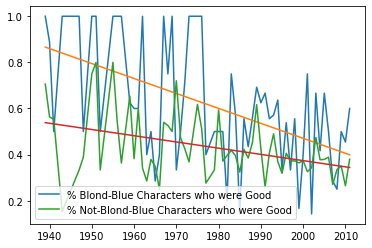

In [27]:
# Plot it, with trend lines
plt.plot(df_year['YEAR'], df_year['pct_bl_bl_good'], label='% Blond-Blue Characters who were Good')
m, b = np.polyfit(df_year['YEAR'], df_year['pct_bl_bl_good'], 1)
plt.plot(df_year['YEAR'], m*df_year['YEAR'] + b)

plt.plot(df_year['YEAR'], df_year['pct_not_bl_bl_good'], label='% Not-Blond-Blue Characters who were Good')
m, b = np.polyfit(df_year['YEAR'], df_year['pct_not_bl_bl_good'], 1)
plt.plot(df_year['YEAR'], m*df_year['YEAR'] + b)

plt.legend()

plt.show()